### Hospitalization Hypothesis Testing

#### Assignment
As a data scientist working at Apollo, the ultimate goal is to tease out meaningful and actionable insights from Patient-level collected data. You can help Apollo hospitals to be more efficient, influence diagnostic and treatment processes, and to map the spread of a pandemic.

One of the best examples of data scientists making a meaningful difference at a global level is in the response to the COVID-19 pandemic, where they have improved information collection, provided ongoing and accurate estimates of infection spread and health system demand, and assessed the effectiveness of government policies.

The company wants to know:

Which variables are significant in predicting the reason for hospitalization for different regions;
How well some variables like viral load, smoking, and severity level describe the hospitalization charges;


### Data Description
The file apollo_data.csv contains anonymized data of COVID-19 hospital patients and contains the following variables:

age - an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government)

sex - the policy holder's gender, either male or female

smoker - 'yes' or 'no' depending on whether the insured regularly smokes tobacco

region - beneficiary's place of residence in Delhi, divided into four geographic regions - northeast, southeast, southwest, or northwest

viral load - the amount of virus in an infected person's blood

severity level - an integer indicating how severe the patient is

hospitalization charges - individual medical costs billed to health insurance


### Practicalities
Analyze the provided data and provide insights to the best of your abilities. Use statistical tests to support your claims. Include the relevant tables/graphs/visualization to explain what you have learned. Make sure that the solution reflects your entire thought process including the preparation of data - it is more important how the code is structured rather than just the final result or plot.

In [6]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [10]:
# loading the dataset 
df = pd.read_csv('apollo_data.csv')
df.head()

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


In [18]:
# reseting the index 
df = df.set_index('Unnamed: 0')

,age,sex,smoker,region,viral load,severity level,hospitalization charges
Unnamed: 0,,,,,,,
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667


In [20]:
# Renaming index column
df.index.name = None

In [26]:
df.shape

(1338, 7)

There are 1,338 patients and 7 columns describing each patient

In [31]:
# Summary statistics 
df.describe(include = 'all')

,age,sex,smoker,region,viral load,severity level,hospitalization charges
count,1338.000000,1338,1338,1338,1338.000000,1338.000000,1338.000000
unique,NaN,2,2,4,NaN,NaN,NaN
top,NaN,male,no,southeast,NaN,NaN,NaN
freq,NaN,676,1064,364,NaN,NaN,NaN
mean,39.207025,NaN,NaN,NaN,10.221233,1.094918,33176.058296
std,14.049960,NaN,NaN,NaN,2.032796,1.205493,30275.029296
min,18.000000,NaN,NaN,NaN,5.320000,0.000000,2805.000000
25%,27.000000,NaN,NaN,NaN,8.762500,0.000000,11851.000000
50%,39.000000,NaN,NaN,NaN,10.130000,1.000000,23455.000000
75%,51.000000,NaN,NaN,NaN,11.567500,2.000000,41599.500000


In [41]:
# Datatypes 
df.dtypes

age                          int64
sex                         object
smoker                      object
region                      object
viral load                 float64
severity level               int64
hospitalization charges      int64
dtype: object

**Initial insights from the descriptive statistics**
- Numerical columns seem to be slightly right skewed since the mean is greater than the median in all the numerical columns
- For the sex column, there are just slightly more males than females in the dataset 
- Most of the participants in this dataset are also non smokers 

In [39]:
# Checking for missing values 
df.isnull().sum()  # No missing values 

age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

### Visual Analysis 

<Axes: xlabel='viral load', ylabel='Count'>

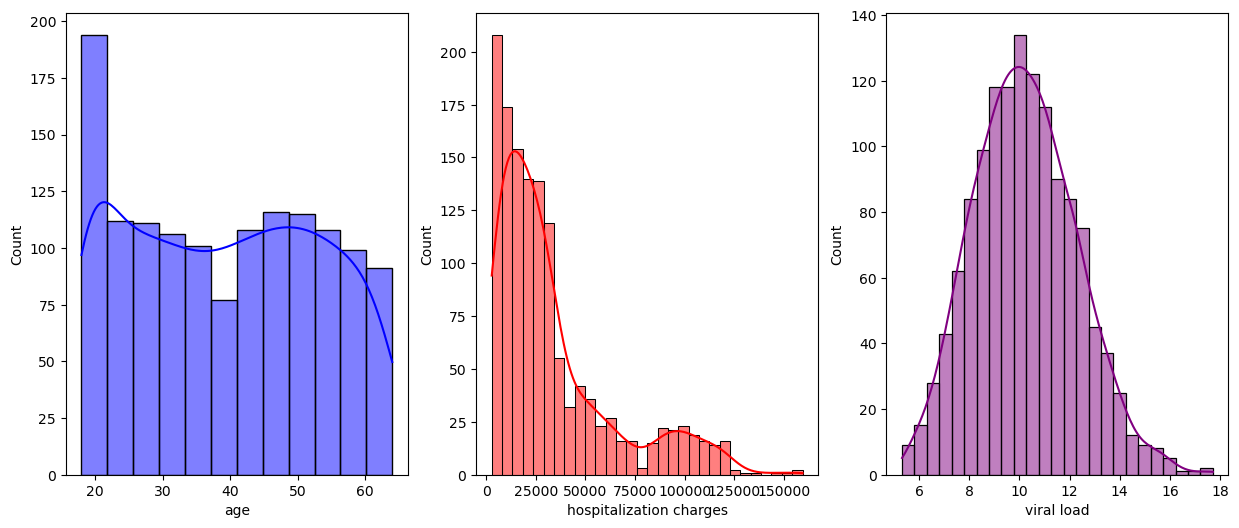

In [86]:
# Distributions of the dataset 
fig, ax = plt.subplots(1,3,figsize=(15,6))
sns.histplot(df['age'], color= 'blue',kde = True, ax=ax[0])
sns.histplot(df['hospitalization charges'], color= 'red',kde = True, ax=ax[1])
sns.histplot(df['viral load'], color= 'purple',kde = True, ax=ax[2])



- Insights from the numerical distributions 
Viral load is normally distributed suggesting most patients had around the same viral load
Hospitalization charges is right skewed suggesting fewer patients with very high hosipitalization charges
Age distibution suggest a more uniform age range between patients with the exception of patients in the early twenties with a higher count number 

Interested in seeeing whether there is a discrepancy in hospitalization charges acroos sex, smoker status.  I am guessing the smoker status would essentially show a higher boxplot suggesting higher prices unlike sex which i am expecting similar distribution in charges.
Also, I am curious to see whether there is discrepancy in charges between the different regions

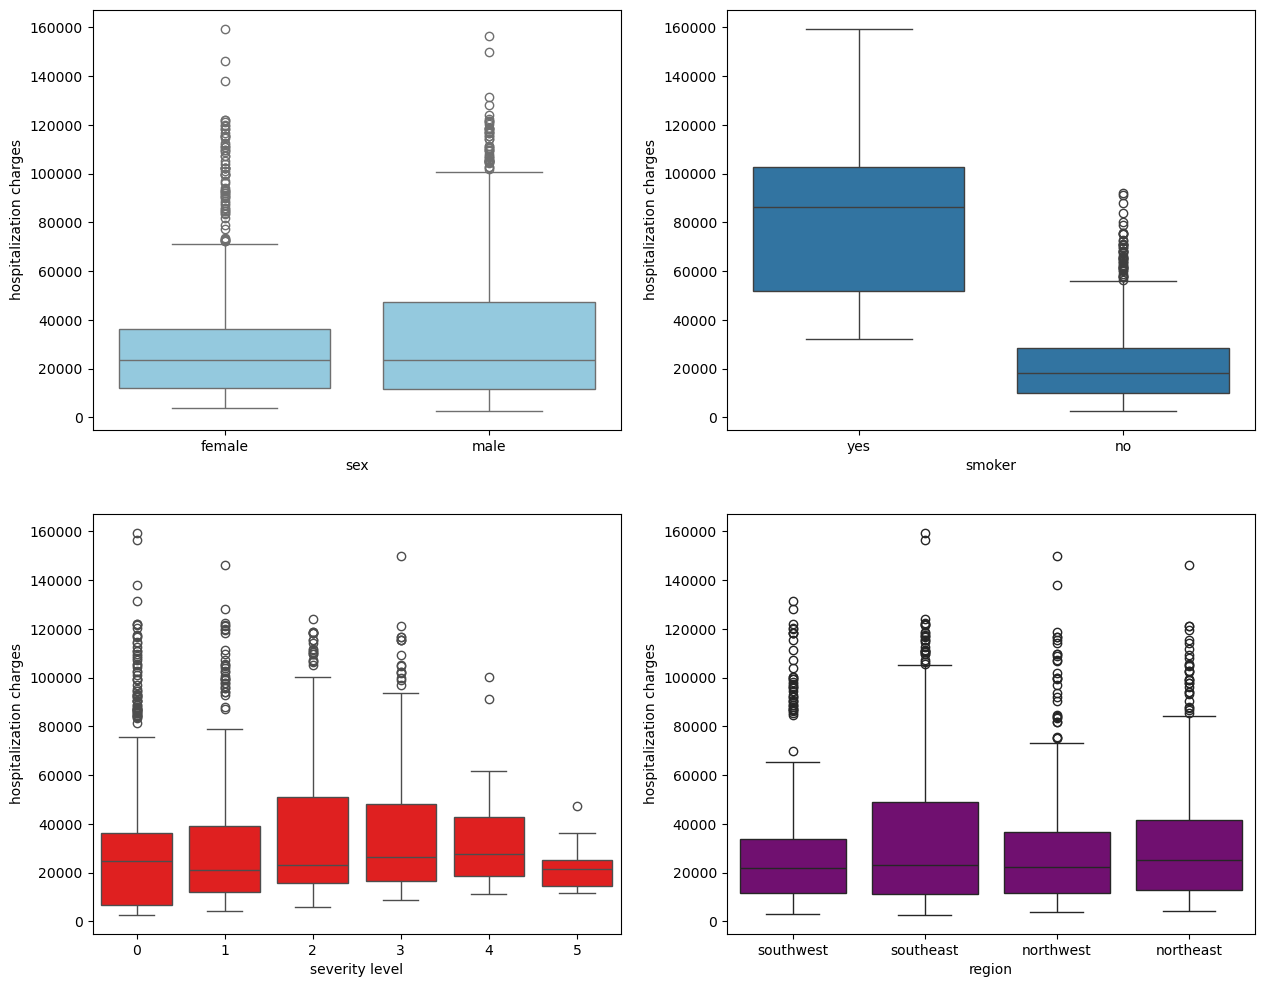

In [155]:
# Boxplot of hospitalization charges against sex and smoker status
fig, ax = plt.subplots(2,2,figsize = (15,12))
sns.boxplot(x = 'sex', y = 'hospitalization charges', color= 'skyblue',data = df, ax = ax[0,0])
sns.boxplot(x = 'smoker', y = 'hospitalization charges', data = df, ax=ax[0,1])
sns.boxplot(x = 'severity level', y = 'hospitalization charges',color = 'red', data = df, ax=ax[1,0])
sns.boxplot(x = 'region', y = 'hospitalization charges', color = 'purple',data = df, ax=ax[1,1])
plt.show()

Insights from the relationship between each of the categorical columns and the hospitalization charges 
- One important notice straight away is that people who smoke tend to have higher chargers than people who do not.
- What is surprising is that the higher the severity level of a patient does not see, to increase hospialization charges. I would have imagines these patients stay in the hospital longer and hence pay more
- The distirbutions of charges among the sexes seems to be comparable with males slighly paying more than females.
- ALso there does not seem to be anydiscrepancies between charges and the patients place of residence
- There also seems to be a lot of outliers in this dataset. This might be dealt duing the modelling phase

<Axes: xlabel='viral load', ylabel='hospitalization charges'>

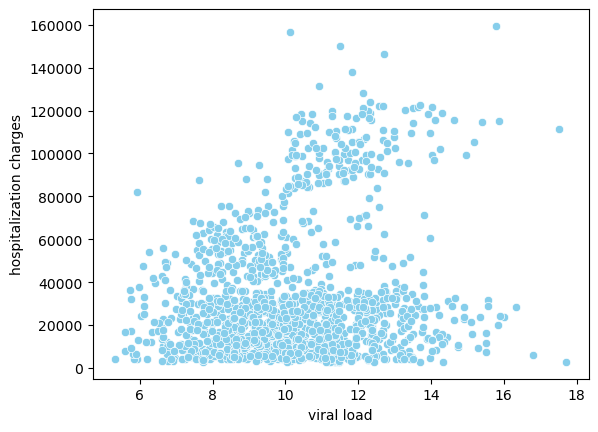

In [172]:
# Scatterplot Analysis 
sns.scatterplot(x = 'viral load', y = 'hospitalization charges', color= 'skyblue',data = df)


- there is a slight positive but weak relationship between viral load and hospitalization charge from the scatterplot

### More Statistical Analysis 

- I will be performing correlational analysis to describe how viral load and severity levels correlate with hospitalization charges using spearman test
- Also I would be using the chi squared test to check for any association between the region of the patients residence and the smoking status

In [177]:
# Correlational analysis of the viral load and severity levels against charges.
df[['viral load', 'hospitalization charges']].corr(method='spearman')

,viral load,hospitalization charges
viral load,1.000000,0.119487
hospitalization charges,0.119487,1.000000


Weak correlation between viral load and hospitalization charges

In [189]:
df[['severity level', 'hospitalization charges']].corr(method='spearman')

,severity level,hospitalization charges
severity level,1.000000,0.133342
hospitalization charges,0.133342,1.000000


Also weak postivive correlation between patients with higher sever levels and their hospitalization charges

In [184]:
# Chi squared test on association between Region and smoking status
# Null hypothesis is that there is no difference between region and smoking status
from scipy.stats import chi2_contingency

table = pd.crosstab(df['region'], df['smoker'])
ch12, p, dof, expected = chi2_contingency(table)
print(f'The pvalue : {p}')

The pvalue : 0.06171954839170543


With a p-value greater than 0.05, we failed to reject the null hypothesis. Hence, no difference between place of reisdence of patient and their smoking status 

In [195]:
# Curious about age and smoking status 
table = pd.crosstab(df['age'], df['smoker'])
ch12, p, dof, expected = chi2_contingency(table)
print(f'The pvalue : {p}')

The pvalue : 0.2388101065098031


There also seem to be no association between age and smoking status. Pvalue of 0.23 hence we fail to reject the null

### Building a XGBoost Regressor to predict the hospitalization charges 
- I decided to use xgBoost due to its interpratability using SHAP analysis to understand why the model
made certain predictions that deviated from the mean values
- Preprocessing, splitting the dataset, fitting the training data, predictions on test data and SHAP anaylsis
-  Results from SHAP analysis might also provide more insights to the variance in the hospitalization charges


#### Model Preprocessing 

In [256]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error
import shap

In [214]:
# Separating input and target features 
X = df.drop('hospitalization charges', axis = 1) 
y = df['hospitalization charges']

In [218]:
# train test split on dataset 
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42,test_size=0.2)

In [227]:
# Pipeline for column transformations 
cat_columns = ['sex','region','smoker']
ordinal_column = ['severity level']

#Column Transformations
column_transformer = ColumnTransformer(transformers=[('encoded_cat_column', OneHotEncoder(), cat_columns),
                                        ('ordinal', OrdinalEncoder(),ordinal_column)],
                                        remainder= 'passthrough')

# Fitting transformer on training an test set 
X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


#### Model Building 


In [229]:
xgb = XGBRegressor()
xgb.fit(X_train_transformed, y_train) 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [268]:
# Metrics 
y_test_pred = xgb.predict(X_test_transformed)
rmse_score = root_mean_squared_error(y_test, y_test_pred)
print(f'Mean charges : {y.mean()}, Standard deviation : {y.std()} and the rmse score : {rmse_score}')

Mean charges : 33176.058295964125, Standard deviation : 30275.029296412235 and the rmse score : 12446.666301821204


An RMSE of 12,446.67 means that, on average, the model’s predicted hospitalization charges deviate from the actual values by about 12477. But since our data is heavily right skewed mean absolute error and the coeffiecient of determination might be more of an apt metrics to evaluate our model 

In [235]:
# R-squared score 
rsquared_score = r2_score(y_test, y_test_pred)
rsquared_score

0.8403393030166626

A coefficient of determination (R2) of 0.84 means that model was able to explain 84 percent of the variance we see in hospitalization charges using the models input features. 16 percent of the varinace on the other represents facotrs the model couldn't capture 

In [258]:
mean_absolute_score = mean_absolute_error(y_test, y_test_pred)
mean_absolute_score

7152.016479036702

A mean absolute error value of 7152 means on average the hospitalization charges are off by 7,152 units

In [239]:
# Shap Analysis 
explainer = shap.Explainer(xgb) 
shap_values = explainer(X_test_transformed)

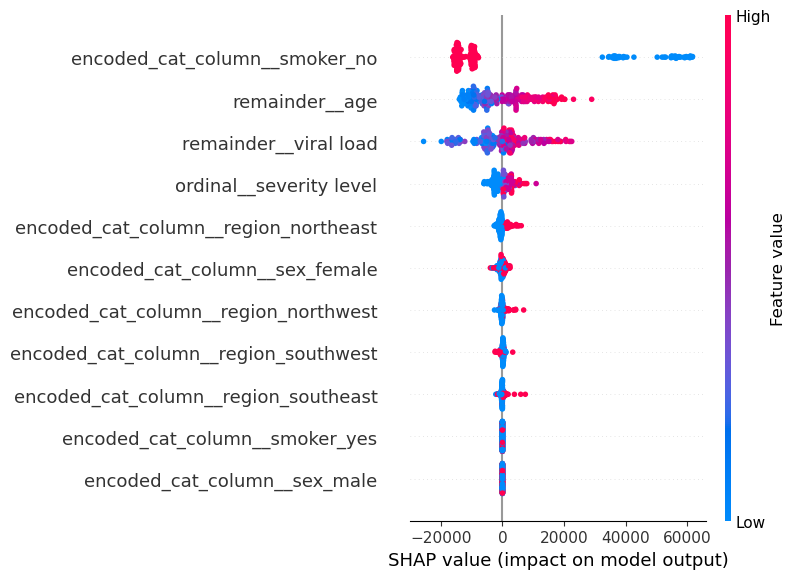

In [245]:
# Feature names 
feature_names = column_transformer.get_feature_names_out()
X_test_named = pd.DataFrame(X_test_transformed, columns=feature_names)
shap.summary_plot(shap_values, X_test_named)

- A clear explainer to higher hospitalization charges is whether a patient was a smoker or not. So patients who were smokers contributed to the higher values oh hospitalization charges. 
- We also see that the model predicted charges on the higher end above the mean for older patients
- Model also predicted charges on slightly higher end for patients with higher than average viral load 
